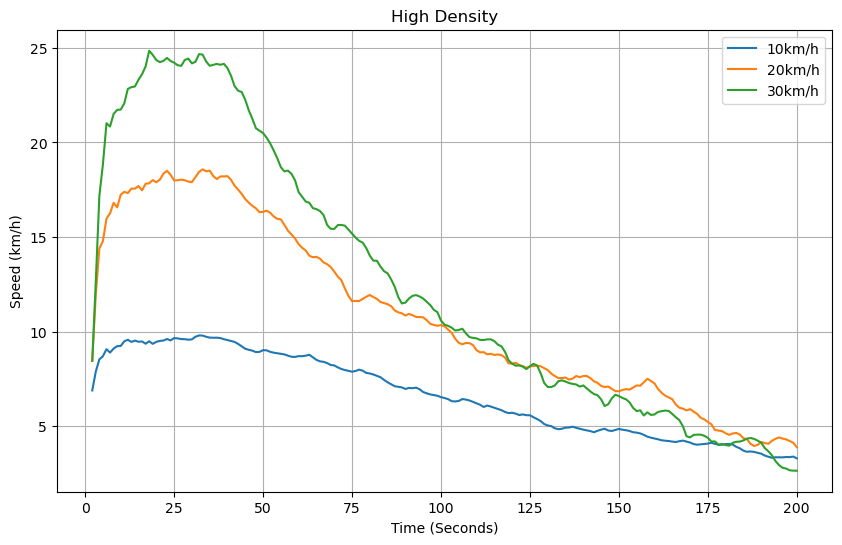

In [15]:
import matplotlib.pyplot as plt

# 파일 리스트
files = ["resources/avgSpeed-10-high.txt", "resources/avgSpeed-20-high.txt", "resources/avgSpeed-30-high.txt"]
labels = ['10km/h', '20km/h', '30km/h']  # 속도와 파일 이름이 일치하도록 수정

# 그래프 그리기
plt.figure(figsize=(10, 6))

for i, file in enumerate(files):
    times = []
    speeds = []
    
    with open(file, "r") as f:
        for line in f:
            time, speed = map(float, line.strip().split(","))
            times.append(time)
            speeds.append(speed)
    
    plt.plot(times, speeds, linestyle='-', label=labels[i])  # labels[i] 사용

# 그래프 설정
plt.xlabel("Time (Seconds)")
plt.ylabel("Speed (km/h)")
plt.title("High Density")
plt.legend()
plt.grid(True)
plt.show()


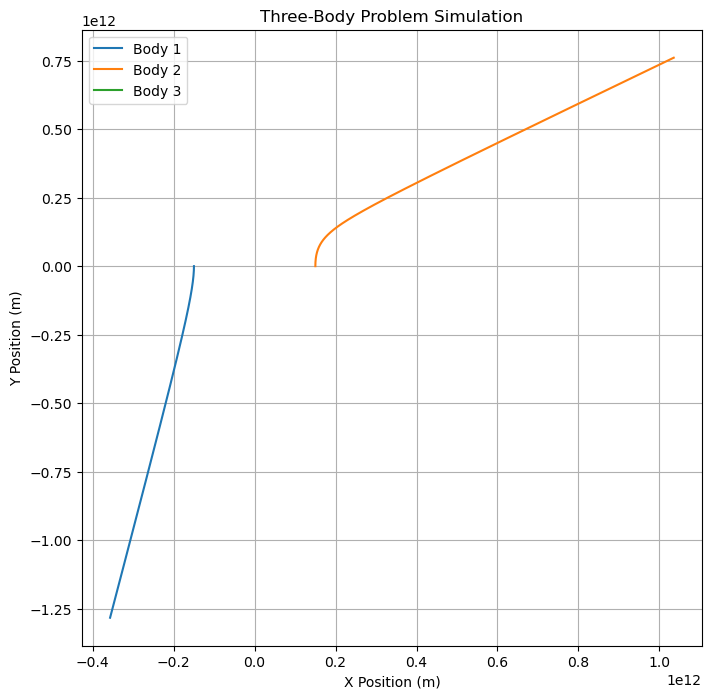

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# 중력상수 G
G = 6.67430e-11  

# 초기 질량 (kg)
m1, m2, m3 = 5.972e24, 7.348e22, 1.989e30  

# 초기 위치 (m)
r1 = np.array([-1.0, 0, 0]) * 1.5e11
r2 = np.array([1.0, 0, 0]) * 1.5e11
r3 = np.array([0, 1.0, 0]) * 1.5e11

# 초기 속도 (m/s)
v1 = np.array([0, -30000, 0])
v2 = np.array([0, 30000, 0])
v3 = np.array([0, 0, 0])

# 초기 상태 벡터
y0 = np.hstack([r1, r2, r3, v1, v2, v3])

def equations(t, y):
    r1, r2, r3 = y[:3], y[3:6], y[6:9]
    v1, v2, v3 = y[9:12], y[12:15], y[15:18]
    
    def force(m1, m2, r1, r2):
        r = np.linalg.norm(r2 - r1)
        return G * m1 * m2 * (r2 - r1) / r**3
    
    a1 = (force(m2, m1, r2, r1) + force(m3, m1, r3, r1)) / m1
    a2 = (force(m1, m2, r1, r2) + force(m3, m2, r3, r2)) / m2
    a3 = (force(m1, m3, r1, r3) + force(m2, m3, r2, r3)) / m3

    return np.hstack([v1, v2, v3, a1, a2, a3])

# 시간 범위 설정
t_span = (0, 3.154e7)  # 1년 (초 단위)
t_eval = np.linspace(*t_span, 1000)

# 수치적 적분 수행
sol = solve_ivp(equations, t_span, y0, t_eval=t_eval, method='RK45')

# 궤적 플로팅
plt.figure(figsize=(8, 8))
plt.plot(sol.y[0], sol.y[1], label="Body 1")
plt.plot(sol.y[3], sol.y[4], label="Body 2")
plt.plot(sol.y[6], sol.y[7], label="Body 3")
plt.legend()
plt.xlabel("X Position (m)")
plt.ylabel("Y Position (m)")
plt.title("Three-Body Problem Simulation")
plt.grid()
plt.show()


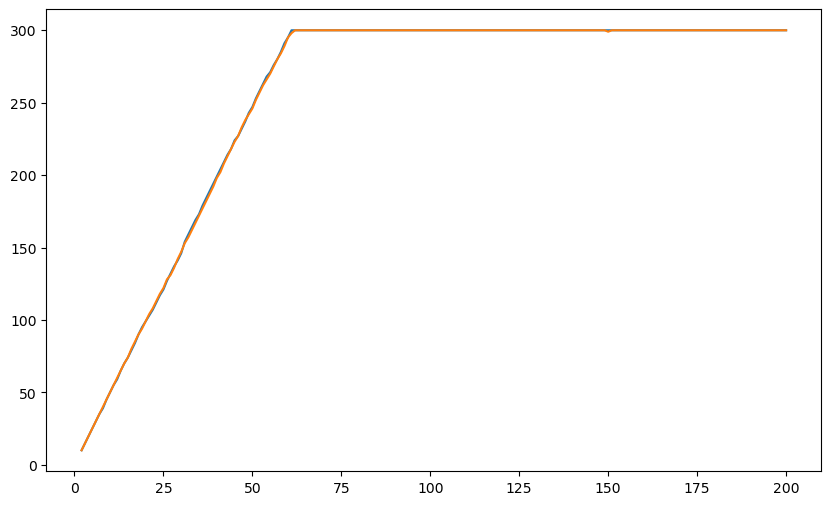

In [15]:
import matplotlib.pyplot as plt


files = ["resources2/avgSpeed-10.txt", "resources2/avgSpeed-30.txt"]

plt.figure(figsize=(10, 6))

for i, file in enumerate(files) :
    times =[]
    speeds = []
    densitys = []
    with open(file, 'r') as f:
        for line in f:
            time, speed, density = map(float, line.strip().split(','))
            times.append(time)
            speeds.append(speed)
            densitys.append(density)
    plt.plot(times, densitys)
plt.show()

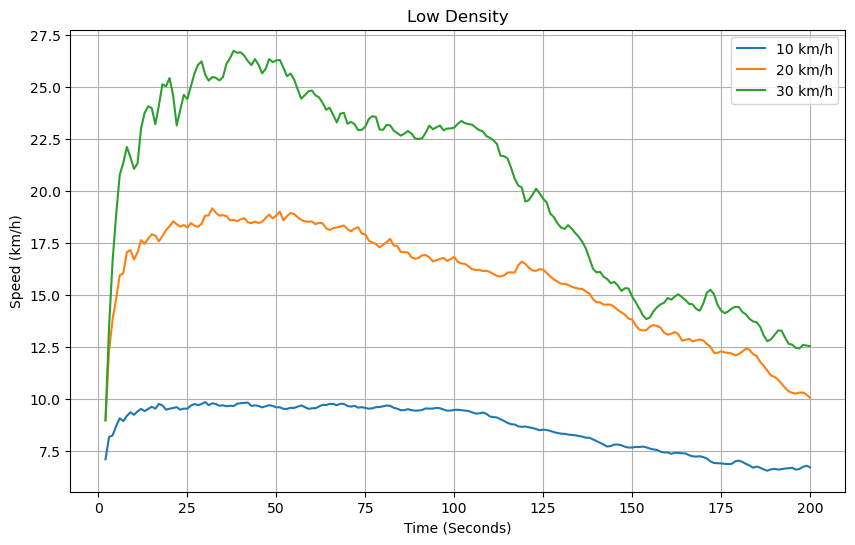

In [2]:
import matplotlib.pyplot as plt

# 파일 리스트 및 레이블
files = ["resources/avgSpeed-10-low.txt", "resources/avgSpeed-20-low.txt", "resources/avgSpeed-30-low.txt"]
labels = ["10 km/h", "20 km/h", "30 km/h"]  # 보기 좋은 레이블

# 그래프 그리기
plt.figure(figsize=(10, 6))

for i, file in enumerate(files):
    times = []
    speeds = []
    
    with open(file, "r") as f:
        for line in f:
            time, speed = map(float, line.strip().split(","))
            times.append(time)
            speeds.append(speed)
    
    plt.plot(times, speeds, linestyle='-', label=labels[i])  # labels[i] 적용

# 그래프 설정
plt.xlabel("Time (Seconds)")
plt.ylabel("Speed (km/h)")
plt.title("Low Density")
plt.legend()
plt.grid(True)
plt.show()
